In [40]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix  , classification_report
import warnings
warnings.filterwarnings("ignore")

In [41]:
data=pd.read_csv("sonar.csv")
data=pd.read_csv("sonar.csv",names=range(0,61),header=0)

In [42]:
data=pd.DataFrame(data)

In [43]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [44]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [45]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

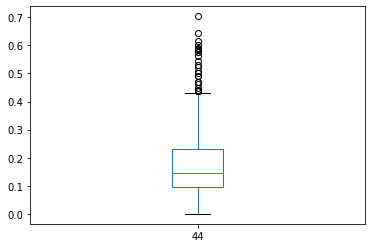

In [46]:
data[44].plot.box()

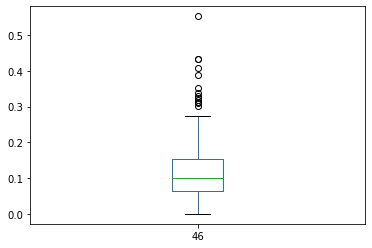

In [47]:
data[46].plot.box()

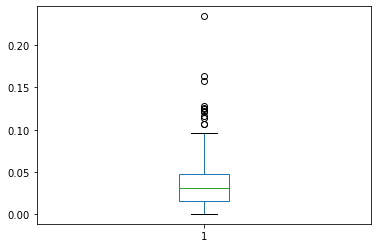

In [48]:
data[1].plot.box()

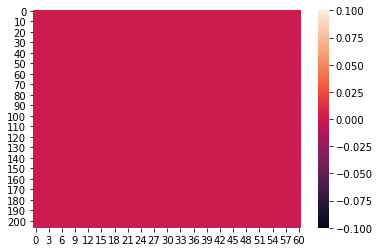

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())
plt.show()

In [50]:
data.describe

<bound method NDFrame.describe of          0       1       2       3       4       5       6       7       8   \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ... 

In [51]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
1,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
2,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
3,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
4,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
5,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
6,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
7,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
8,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
9,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


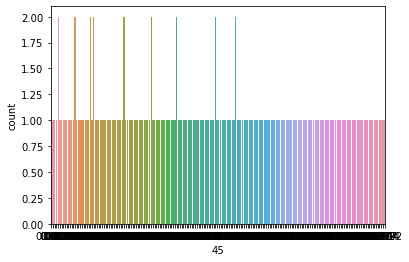

In [52]:
sns.countplot(x=45,data=data)

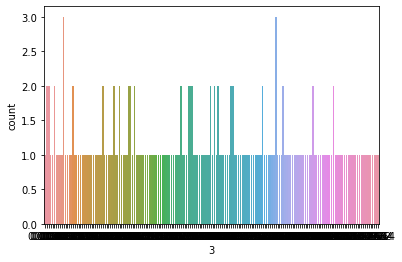

In [53]:
sns.countplot(x=3,data=data)

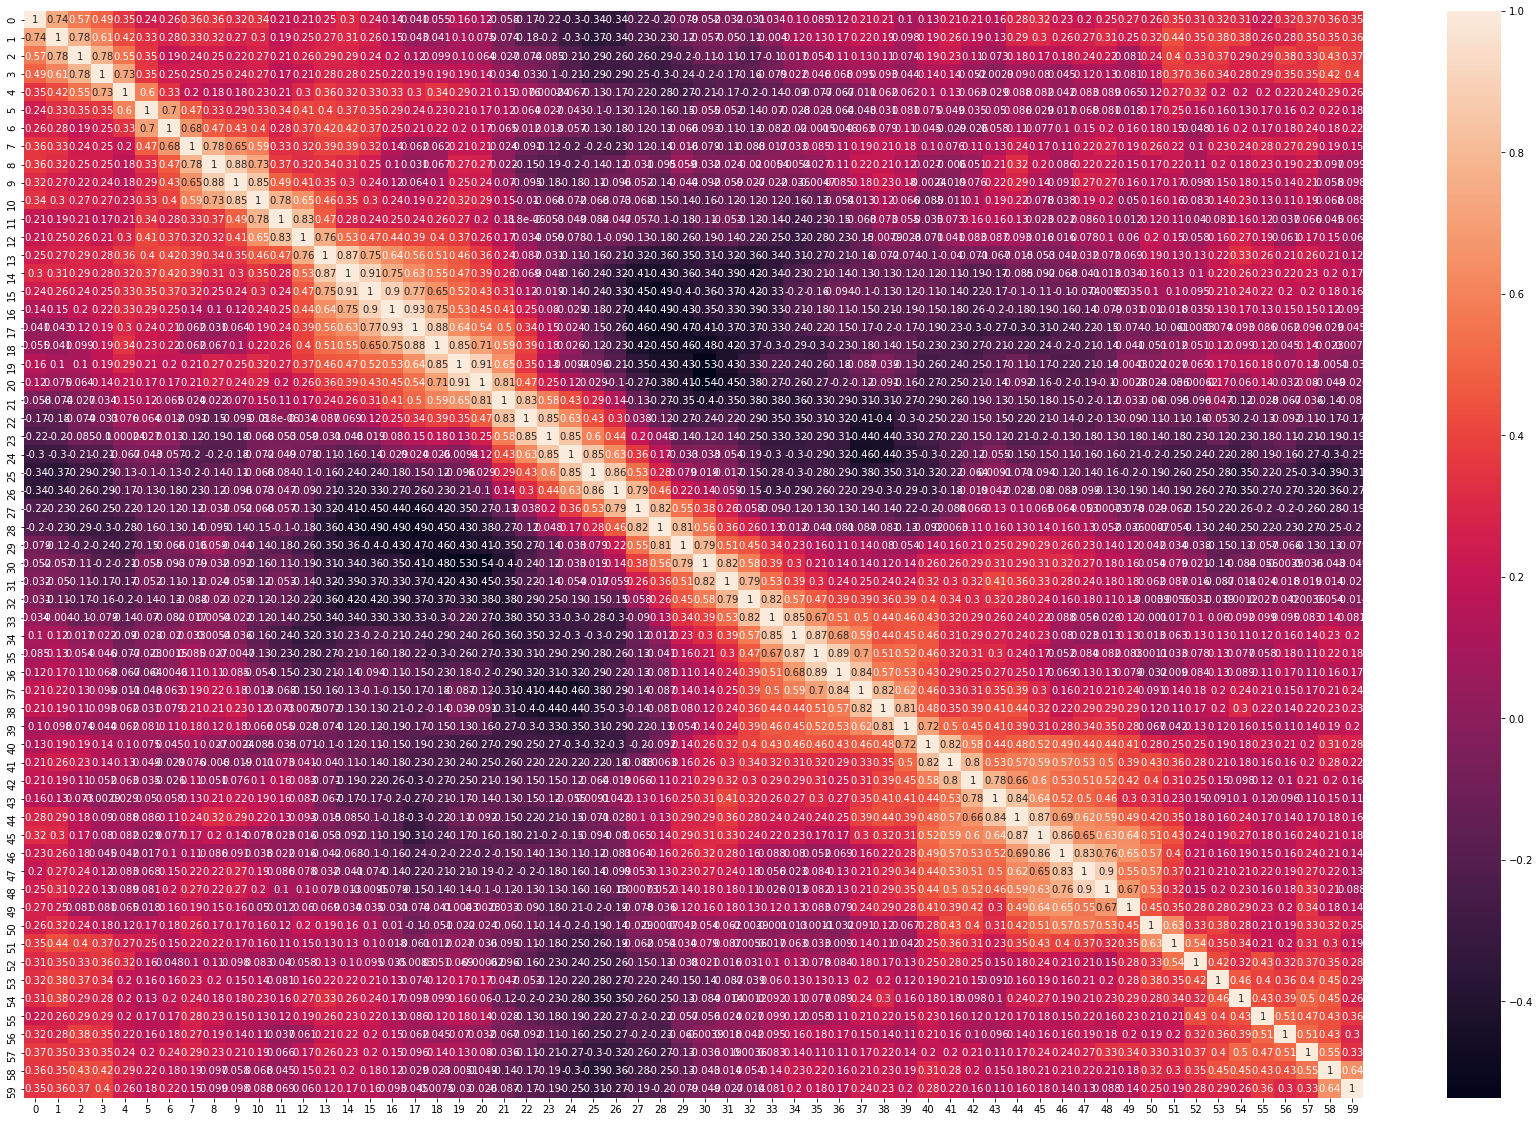

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [55]:
x=pd.DataFrame(data.iloc[:,0:-1])
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [56]:
y=pd.DataFrame(data.iloc[:,-1])
y

,60
0,R
1,R
2,R
3,R
4,R
...,...
202,M
203,M
204,M
205,M


In [57]:
y.shape

(207, 1)

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
x.shape

(207, 60)

In [60]:
y.shape

(207,)

In [61]:
x.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
dtype: object

In [62]:
type(y)

numpy.ndarray

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,train_df,train_target):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",i,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

r2 score corresponding to 42 is 0.05064124932922076
r2 score corresponding to 43 is -0.6114020173013734
r2 score corresponding to 44 is 0.05745294328104611
r2 score corresponding to 45 is 0.03009705630809434
r2 score corresponding to 46 is 0.06228938010173424
r2 score corresponding to 47 is -0.10981190405518904
r2 score corresponding to 48 is 0.17758828416066152
r2 score corresponding to 49 is 0.013758098191191559
r2 score corresponding to 50 is 0.07776527484071283
r2 score corresponding to 51 is 0.18649726162851143
r2 score corresponding to 52 is 0.11957950472730872
r2 score corresponding to 53 is -0.7245806897046636
r2 score corresponding to 54 is 0.12123335512621325
r2 score corresponding to 55 is 0.08579812971811074
r2 score corresponding to 56 is -0.026197256929678003
r2 score corresponding to 57 is 0.13935901262135864
r2 score corresponding to 58 is -0.07928183271660716
r2 score corresponding to 59 is 0.03374959755003448
r2 score corresponding to 60 is -0.20969998719004512
r2 sco

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [66]:
knr=KNeighborsRegressor(n_neighbors=29)
i=maxr2_score(knr,x,y)

r2 score corresponding to 42 is -0.08167525432685951
r2 score corresponding to 43 is 0.10986974752188294
r2 score corresponding to 44 is 0.14575380186494746
r2 score corresponding to 45 is 0.1811335711454618
r2 score corresponding to 46 is -0.06158343242171993
r2 score corresponding to 47 is 0.05601016106366863
r2 score corresponding to 48 is 0.04995453591662602
r2 score corresponding to 49 is 0.05330093573902683
r2 score corresponding to 50 is 0.07679349980182304
r2 score corresponding to 51 is 0.057372175980975104
r2 score corresponding to 52 is 0.08164248184437717
r2 score corresponding to 53 is -0.08111764726394033
r2 score corresponding to 54 is 0.07915746560217429
r2 score corresponding to 55 is 0.08984894525917086
r2 score corresponding to 56 is -0.0013251087704788667
r2 score corresponding to 57 is 0.18158654662816376
r2 score corresponding to 58 is 0.17789227991368295
r2 score corresponding to 59 is 0.26733856215128515
r2 score corresponding to 60 is -0.11302790795271744
r2 sc

In [67]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lr,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -0.26573737615422993
standard deviation in r2 score for Linear Regression 0.5314747523084599

Mean r2 score for KNN Regression: -0.08371123593969965
standard deviation in r2 score for KNN Regression 0.1674224718793993


In [68]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parametors,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [69]:
lsreg=Lasso(alpha=0.001)
i=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.1665820546228991
r2 score corresponding to 43 is 0.161018458281738
r2 score corresponding to 44 is 0.24356446194654957
r2 score corresponding to 45 is 0.35387953089317703
r2 score corresponding to 46 is 0.3929053288271529
r2 score corresponding to 47 is 0.26223337878640174
r2 score corresponding to 48 is 0.425292724808055
r2 score corresponding to 49 is 0.04409950955083142
r2 score corresponding to 50 is 0.26547562856273543
r2 score corresponding to 51 is 0.34016057544135214
r2 score corresponding to 52 is 0.3561647982240348
r2 score corresponding to 53 is 0.020878232984763545
r2 score corresponding to 54 is 0.2775296188530961
r2 score corresponding to 55 is 0.1941281807092493
r2 score corresponding to 56 is 0.2560043670933566
r2 score corresponding to 57 is 0.42216257115551603
r2 score corresponding to 58 is 0.2704551397324243
r2 score corresponding to 59 is 0.4770903822152587
r2 score corresponding to 60 is 0.07243041397089034
r2 score corresponding 

In [70]:
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression: -0.18948137964018946
standard deviation in r2 score for Lasso Regression 0.378962759280379


In [71]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [72]:
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=10)
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: -0.045396957783058633
standard deviation in r2 score for gradient boosting Regression 0.09082260594331659


In [73]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parametors={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,lsreg,DecisionTreeRegressor()]}
clg=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [74]:
AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.001,n_estimators=10)
print("Mean r2 score for ada boosting regression:",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2score for ada boosting regression",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting regression: -0.19582548889697704
standard deviation in r2score for ada boosting regression 0.40455504034262085


In [75]:
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.3728267782531497
r2 score corresponding to 43 is 0.598607545278232
r2 score corresponding to 44 is 0.42854220493140505
r2 score corresponding to 45 is 0.8049801570118947
r2 score corresponding to 46 is 0.6916794529392832
r2 score corresponding to 47 is 0.330063444280576
r2 score corresponding to 48 is 0.6504367583390638
r2 score corresponding to 49 is 0.5912713468063746
r2 score corresponding to 50 is 0.482906576272784
r2 score corresponding to 51 is 0.5005064165450933
r2 score corresponding to 52 is 0.7277932842768553
r2 score corresponding to 53 is 0.5205936458606146
r2 score corresponding to 54 is 0.21713696656418024
r2 score corresponding to 55 is 0.5045020496355361
r2 score corresponding to 56 is 0.5907523021120925
r2 score corresponding to 57 is 0.5732998958420551
r2 score corresponding to 58 is 0.7869397676885673
r2 score corresponding to 59 is 0.3926650423248125
r2 score corresponding to 60 is 0.19950203147529022
r2 score corresponding to 61 is

In [76]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=0.20)
ada_reg=AdaBoostRegressor()
ada_reg.fit(x,y)
y_pred=ada_reg.predict(x_test)

In [77]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.110581001135224
r2_score is: 0.9449732898456922


In [78]:
import joblib
joblib.dump(ada_reg,"sonar_ds.pkl")

['sonar_ds.pkl']